In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ba-task2/ba_task2_data.csv


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [198]:
data = pd.read_csv('/kaggle/input/ba-task2/ba_task2_data.csv')
data.shape

(50000, 14)

In [150]:
data['wants_in_flight_meals'].value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [199]:
data.drop(['booking_origin', 'route','trip_type','sales_channel'], inplace=True, axis=1)#,'num_passengers','flight_duration','wants_in_flight_meals', 'wants_preferred_seat','flight_day'], inplace=True, axis = 1)

In [200]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [162]:
data.head()

,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_in_flight_meals,booking_complete
0,262,19,7,1,0,0
1,112,20,3,0,0,0
2,243,22,17,1,0,0
3,96,31,4,0,1,0
4,68,22,15,1,1,0


In [176]:
data = data[['purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage','booking_complete']]

In [31]:
# data['flight_duration'].hist()

In [23]:
#data.groupby(by = 'sales_channel')['booking_complete'].value_counts()

In [14]:
import seaborn as sns
# sns.pairplot(data)

In [4]:
# f, ax = plt.subplots(figsize=(10, 8))
# sns.heatmap(data.corr(),
#     cmap=sns.diverging_palette(220, 10, as_cmap=True),
#     vmin=-1.0, vmax=1.0,
#     square=True, ax=ax)

In [59]:
data['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [201]:
X = data.loc[:, data.columns != 'booking_complete']
y = data['booking_complete']

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   purchase_lead   50000 non-null  int64
 1   length_of_stay  50000 non-null  int64
 2   flight_hour     50000 non-null  int64
 3   flight_day      50000 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [179]:
# df = data[['num_passengers','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','booking_complete']]
# X = df.loc[:, df.columns != 'booking_complete']
# y = df['booking_complete']

In [202]:
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, stratify = y_train, random_state = 42)

In [167]:
X_train.shape, X_test.shape

((40000, 2), (10000, 2))

In [121]:
y_train.value_counts()

0    34018
1     5982
Name: booking_complete, dtype: int64

In [93]:
y_test.value_counts()

0    8504
1    1496
Name: booking_complete, dtype: int64

In [204]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [180]:
import matplotlib.pyplot as plt

In [181]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.058 seconds


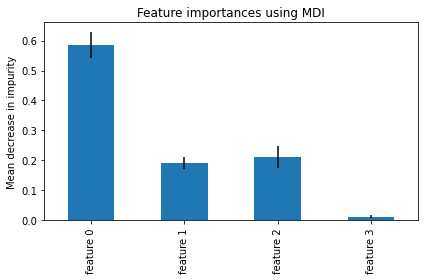

In [182]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [174]:
X_train.head(2)

,purchase_lead,flight_hour
11179,168,8
26739,54,1


Elapsed time to compute the importances: 8.442 seconds


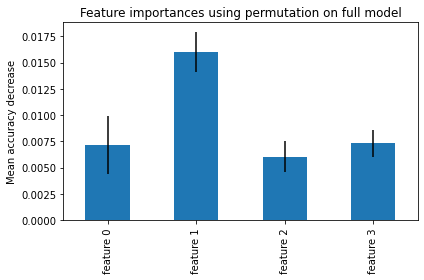

In [183]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [172]:
X_test.columns

Index(['purchase_lead', 'flight_hour'], dtype='object')

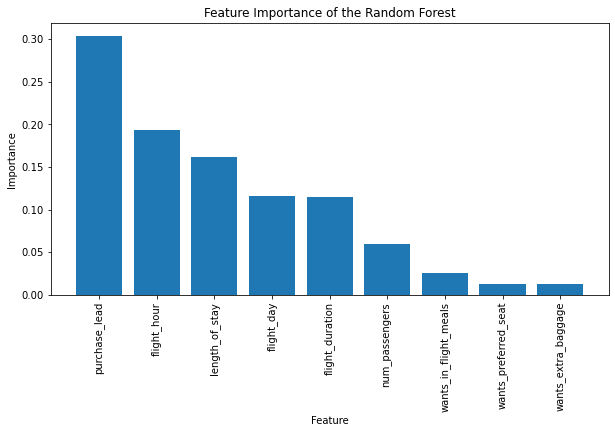

In [205]:
importances = forest.feature_importances_

# Get feature names
feature_names = X_test.columns

# Create a dataframe with feature importances and feature names
feature_importance = pd.DataFrame(list(zip(feature_names, importances)), columns=["Feature", "Importance"])

# Sort the dataframe by feature importances
feature_importance.sort_values(by=['Importance'], ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10,5))
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance of the Random Forest")
plt.show()


In [206]:
y_pred = forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.45      0.05      0.10      1496

    accuracy                           0.85     10000
   macro avg       0.65      0.52      0.51     10000
weighted avg       0.79      0.85      0.79     10000



In [197]:
y_pred = forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## with all except first 2

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.45      0.06      0.10      1496

    accuracy                           0.85     10000
   macro avg       0.65      0.52      0.51     10000
weighted avg       0.80      0.85      0.80     10000



In [112]:
y_pred = forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## with 4 features ['purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage'],

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      8504
           1       0.26      0.13      0.18      1496

    accuracy                           0.81     10000
   macro avg       0.56      0.53      0.54     10000
weighted avg       0.77      0.81      0.79     10000



In [72]:
y_pred = forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


## with only numeric 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8504
           1       0.25      0.10      0.14      1496

    accuracy                           0.82     10000
   macro avg       0.56      0.52      0.52     10000
weighted avg       0.77      0.82      0.79     10000



In [53]:
y_pred = forest.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## 	purchase_lead	length_of_stay	flight_hour	flight_day	wants_extra_baggage	wants_preferred_seat	wants_in_flight_meals

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8504
           1       0.32      0.08      0.13      1496

    accuracy                           0.84     10000
   macro avg       0.59      0.53      0.52     10000
weighted avg       0.78      0.84      0.79     10000



In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
feature_names[:2]

['feature_0', 'feature_1']

In [187]:
pipe = Pipeline([
    #('feature_selection', SelectFromModel(LogisticRegressionCV(penalty="l2"))),
    ('classification', RandomForestClassifier(random_state = 42))
])

In [188]:
#param_grid = {'classification__max_depth': [1, 2, 3, 4]}

In [189]:
grid = GridSearchCV(pipe, param_grid, cv=10, scoring = 'f1_micro')

In [190]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classification',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classification__max_depth': [1, 2, 3, 4]},
             scoring='f1_micro')

In [141]:
# import sklearn
# sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [191]:
best_clf = grid.best_estimator_

In [192]:
best_clf

Pipeline(steps=[('classification',
                 RandomForestClassifier(max_depth=1, random_state=42))])

In [154]:
# Print the best parameters and the best score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
print("Best Classifier:", best_clf)

Best Parameters: {'classification__max_depth': 1}
Best Score: 0.7816878384488977
Best Classifier: Pipeline(steps=[('classification',
                 RandomForestClassifier(max_depth=1, random_state=42))])


In [193]:
y_pred = best_clf.predict(X_test)

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8504
           1       0.00      0.00      0.00      1496

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.72      0.85      0.78     10000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    best_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 0.606 seconds


In [92]:
import matplotlib.pyplot as plt

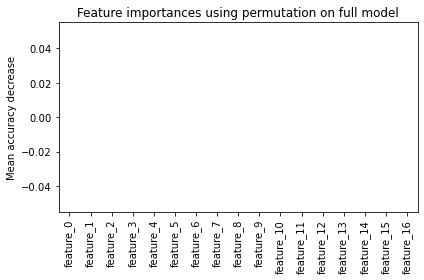

In [94]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [83]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Get the decision tree of the best classifier
tree = best_clf.named_steps['classification'].estimators_

# Export the decision tree to a dot file
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns, class_names=['Booked', 'Not_Booked'], filled=True, rounded=True, special_characters=True)

# Create a graph object
graph = Source(dot_data)

# Visualize the graph
graph.view()


TypeError: [DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1608637542), DecisionTreeClassifier(max_depth=2, max_features='auto',
                       random_state=1273642419)] is not an estimator instance.